# Bank Marketing Classification

In this part of the assignment we want to do a classification task using PyTorch on bank marketing dataset.

#Import Library

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import tqdm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from torch.utils.data import DataLoader, TensorDataset

#Load Dataset
Here, you should download and load the dataset. After that, you should split train dataset to train and validation sets. Finally, define the dataloaders for `train`, `validation` and `test`

In [7]:
# Encode categorical data
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

# Split features and target
X = data.drop('y', axis=1)
y = data['y']

# Normalize numerical data
numerical_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train.values, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.int64)
X_val = torch.tensor(X_val.values, dtype=torch.float32)
y_val = torch.tensor(y_val.values, dtype=torch.int64)
X_test = torch.tensor(X_test.values, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.int64)

# Create DataLoader
train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=32, shuffle=True)
val_loader = DataLoader(TensorDataset(X_val, y_val), batch_size=32)
test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=32)


#Normalize data
normalize numerical data.

In [ ]:
# Normalize numerical data

# Create Data Loader
create data loader for pytorch

In [ ]:
#TODO

#Model
define your model in here

In [8]:
class BankMarketingNet(nn.Module):
    def __init__(self):
        super(BankMarketingNet, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 2)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = BankMarketingNet()


#Train your model
Define `criterion` and `optimizer`.
Train your model

Tasks:
- [ ] Things that are needed to be printed in each epoch:
  - Number of epoch
  - Train loss
  - Validation loss
- [ ] save train/validation loss (of each epoch) in an array for later usage

In [9]:
#TODO
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 20
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for X_batch, y_batch in tqdm.tqdm(train_loader):
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    train_losses.append(train_loss / len(train_loader))

    model.eval()
    val_loss = 0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            val_loss += loss.item()

    val_losses.append(val_loss / len(val_loader))

    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_losses[-1]:.4f}, Validation Loss: {val_losses[-1]:.4f}')


100%|██████████| 1131/1131 [00:01<00:00, 634.84it/s]


Epoch 1/20, Train Loss: 0.2620, Validation Loss: 0.2475


100%|██████████| 1131/1131 [00:01<00:00, 706.77it/s]


Epoch 2/20, Train Loss: 0.2372, Validation Loss: 0.2409


100%|██████████| 1131/1131 [00:01<00:00, 699.47it/s]


Epoch 3/20, Train Loss: 0.2311, Validation Loss: 0.2373


100%|██████████| 1131/1131 [00:01<00:00, 701.78it/s]


Epoch 4/20, Train Loss: 0.2284, Validation Loss: 0.2411


100%|██████████| 1131/1131 [00:02<00:00, 552.93it/s]


Epoch 5/20, Train Loss: 0.2260, Validation Loss: 0.2389


100%|██████████| 1131/1131 [00:01<00:00, 570.83it/s]


Epoch 6/20, Train Loss: 0.2240, Validation Loss: 0.2324


100%|██████████| 1131/1131 [00:01<00:00, 704.68it/s]


Epoch 7/20, Train Loss: 0.2225, Validation Loss: 0.2283


100%|██████████| 1131/1131 [00:01<00:00, 679.25it/s]


Epoch 8/20, Train Loss: 0.2208, Validation Loss: 0.2311


100%|██████████| 1131/1131 [00:01<00:00, 686.72it/s]


Epoch 9/20, Train Loss: 0.2196, Validation Loss: 0.2285


100%|██████████| 1131/1131 [00:01<00:00, 682.43it/s]


Epoch 10/20, Train Loss: 0.2184, Validation Loss: 0.2296


100%|██████████| 1131/1131 [00:01<00:00, 704.24it/s]


Epoch 11/20, Train Loss: 0.2171, Validation Loss: 0.2263


100%|██████████| 1131/1131 [00:02<00:00, 564.84it/s]


Epoch 12/20, Train Loss: 0.2164, Validation Loss: 0.2258


100%|██████████| 1131/1131 [00:02<00:00, 563.72it/s]


Epoch 13/20, Train Loss: 0.2156, Validation Loss: 0.2264


100%|██████████| 1131/1131 [00:01<00:00, 700.49it/s]


Epoch 14/20, Train Loss: 0.2147, Validation Loss: 0.2262


100%|██████████| 1131/1131 [00:01<00:00, 702.42it/s]


Epoch 15/20, Train Loss: 0.2141, Validation Loss: 0.2280


100%|██████████| 1131/1131 [00:01<00:00, 681.56it/s]


Epoch 16/20, Train Loss: 0.2126, Validation Loss: 0.2240


100%|██████████| 1131/1131 [00:01<00:00, 683.31it/s]


Epoch 17/20, Train Loss: 0.2114, Validation Loss: 0.2264


100%|██████████| 1131/1131 [00:01<00:00, 713.13it/s]


Epoch 18/20, Train Loss: 0.2104, Validation Loss: 0.2281


100%|██████████| 1131/1131 [00:01<00:00, 592.23it/s]


Epoch 19/20, Train Loss: 0.2098, Validation Loss: 0.2294


100%|██████████| 1131/1131 [00:01<00:00, 575.06it/s]

Epoch 20/20, Train Loss: 0.2082, Validation Loss: 0.2277


### Visualize Loss plot

Using the arrays that you have (from previous task in the above section), visualize Loss plot (train and validation together)

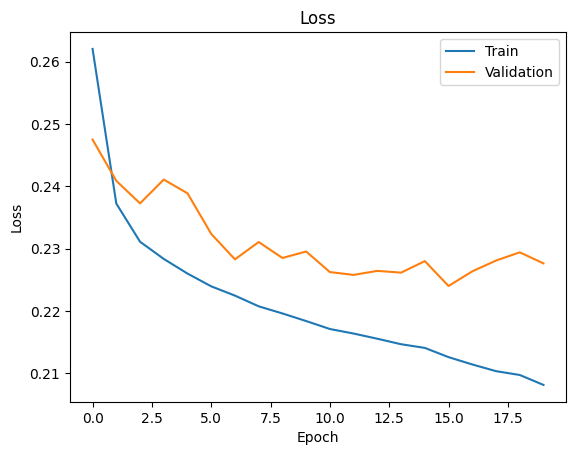

In [10]:
#TODO
plt.plot(train_losses, label='Train')
plt.plot(val_losses, label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')
plt.show()


## Evaluation

Test your trained model (using the Test Dataloader that you have).

In [12]:
#TODO
model.eval()
test_loss = 0
correct = 0
total = 0

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        test_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()

print(f'Accuracy: {100 * correct / total:.2f}%')


Accuracy: 89.63%
